In [23]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import make_classification
import math
from scipy.special import expit


import json
import requests


import xml.etree.ElementTree as ET


%matplotlib inline

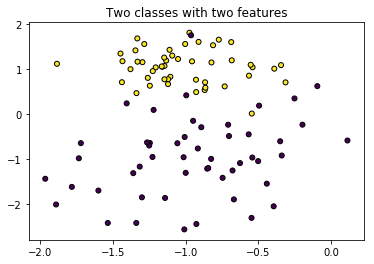

In [24]:
# Start by creating a dataset

# This is a randomly generated dataset for demo purposes, 
# It has two features and 2 classes

# m= 100 number of features
m = 100

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_samples= m)
plt.title('Two classes with two features')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')



In [25]:
# Prepare dydra repo for saving model, we will use sparql, change it with your own repo 
url = "http://dydra.com/skorkmaz/rdfnet_00/sparql"


In [26]:
# As we have two features now we are going to create 1 neuron connected to two inputs, 
#it is a beginner example so we wont have more layers, it outputs the results
n_x = 2

# Set activation function
activation = "sigmoid"

# Initialize weights with small values, don't worry about constant 1, second example will explain more
W = np.random.randn(1, n_x)  * 0.01
# Number of times we propogate back and forth to train our neuron
epoch = 10000
# Finally, famous parameter alpha , the learning rate, now our neural system is ready
learning_rate = 0.001

In [32]:
# OK, now we have our simple neuron, before starting let's save our model
# Connect Dydra to create our model
# As this example is very small, we will just use two sparql requests to create our model

payload = "query=INSERT DATA\n{\n   GRAPH <myrdfnet0> \n{ <http://example.org/layer0/neuron0> <weight> "+ str(W[0][0]) + " . }\n}"
payload2 = "query=INSERT DATA\n{\n   GRAPH <myrdfnet0> \n{ <http://example.org/layer0/neuron0> <weight> "+ str(W[0][1]) + " . }\n}"

headers = {
    'content-type': "application/x-www-form-urlencoded",
    'cache-control': "no-cache"
    }

response = requests.request("POST", url, data=payload, headers=headers)
response = requests.request("POST", url, data=payload2, headers=headers)

print(response.text)

<?xml version="1.0" encoding="UTF-8"?>
<sparql xmlns="http://www.w3.org/2005/sparql-results#">
  <head/>
  <boolean>true</boolean>
</sparql>



In [28]:
# If you want go and check values of our initial model in Dydra repository of yours
for i in range(0, epoch):
    # Forward pass 
    A = np.dot(W , X.T)
    Z = expit(A)
    # Compute cost of the error, using cross entropy
    logprobs = Y * np.log(Z)  + (1.0 - Y) * np.log(1.0 - Z)
    cost = - (1.0 / m) *  np.sum(logprobs) 
    # makes sure cost is the dimension we expect. 
    cost = np.squeeze(cost)     
    if i % 100 == 0:
        print cost                               
    
    # Back propagation 
    # Gradient of the classification
    dZ= A - Y
        # Derivative of the weights 
    dW = (1.0 / m) * np.dot(dZ,A.T)
    # Update parameters through learning 
    W = W - learning_rate * dW


0.691130666662
0.691186608867
0.691242507659
0.691298366327
0.69135418815
0.691409976398
0.691465734334
0.691521465213
0.691577172285
0.691632858793
0.691688527976
0.69174418307
0.691799827305
0.69185546391
0.691911096114
0.691966727142
0.69202236022
0.692077998575
0.692133645435
0.692189304029
0.692244977589
0.692300669352
0.692356382557
0.692412120451
0.692467886282
0.692523683309
0.692579514797
0.692635384018
0.692691294253
0.692747248793
0.69280325094
0.692859304006
0.692915411315
0.692971576205
0.693027802027
0.693084092144
0.693140449939
0.693196878806
0.693253382158
0.693309963427
0.693366626061
0.693423373529
0.69348020932
0.693537136943
0.69359415993
0.693651281837
0.693708506242
0.693765836747
0.693823276983
0.693880830605
0.693938501296
0.693996292768
0.694054208763
0.694112253053
0.694170429441
0.694228741764
0.694287193893
0.694345789731
0.69440453322
0.694463428339
0.694522479102
0.694581689566
0.694641063827
0.694700606021
0.694760320331
0.69482021098
0.694880282239
0.69

In [34]:
# Save Dydra our model, sparql update= delete and insert

payload = "query=CLEAR GRAPH  <myrdfnet0>"
response = requests.request("POST", url, data=payload, headers=headers)



payload = "query=INSERT DATA\n{\n   GRAPH <myrdfnet0> \n{ <http://example.org/layer0/neuron0> <weight> "+ str(W[0][0]) + " . }\n}"
payload2 = "query=INSERT DATA\n{\n   GRAPH <myrdfnet0> \n{ <http://example.org/layer0/neuron0> <weight> "+ str(W[0][1]) + " . }\n}"

headers = {
    'content-type': "application/x-www-form-urlencoded",
    'cache-control': "no-cache"
    }

response = requests.request("POST", url, data=payload, headers=headers)
response = requests.request("POST", url, data=payload2, headers=headers)

print(response.text)

<?xml version="1.0" encoding="UTF-8"?>
<sparql xmlns="http://www.w3.org/2005/sparql-results#">
  <head/>
  <boolean>true</boolean>
</sparql>



In [35]:
# Load our model back from Dydra to see the details
payload = "query=select * where { { graph ?g {?s ?p ?o} } union {?s ?p ?o} } limit 10"
response = requests.request("POST", url, data=payload, headers=headers)

print(response.text)

<?xml version="1.0" encoding="UTF-8"?>
<sparql xmlns="http://www.w3.org/2005/sparql-results#">
  <head>
    <variable name="g"/>
    <variable name="o"/>
    <variable name="p"/>
    <variable name="s"/>
  </head>
  <results>
    <result>
      <binding name="g">
        <uri>myrdfnet0</uri>
      </binding>
      <binding name="o">
        <literal datatype="http://www.w3.org/2001/XMLSchema#decimal">-0.005596807</literal>
      </binding>
      <binding name="p">
        <uri>weight</uri>
      </binding>
      <binding name="s">
        <uri>http://example.org/layer0/neuron0</uri>
      </binding>
    </result>
    <result>
      <binding name="g">
        <uri>myrdfnet0</uri>
      </binding>
      <binding name="o">
        <literal datatype="http://www.w3.org/2001/XMLSchema#decimal">-0.007877712</literal>
      </binding>
      <binding name="p">
        <uri>weight</uri>
      </binding>
      <binding name="s">
        <uri>http://example.org/layer0/neuron0</uri>
      </binding